In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
batch_size=128
n_classes=10
n_epoch=100

In [4]:
# 加载MNIST数据集
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [5]:
# 逻辑回归模型
model = Sequential()
model.add(Dense(output_dim=10, input_shape=(784,), init='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(784,), activation="softmax", units=10, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# 训练
history=model.fit(X_train,y_train,nb_epoch=n_epoch,batch_size=batch_size,verbose=1)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.7364 - acc: 0.8197
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4356 - acc: 0.8840
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3878 - acc: 0.8944
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3637 - acc: 0.8998
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3484 - acc: 0.9029
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3375 - acc: 0.9057
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3292 - acc: 0.9087
Epoch 8/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3228 - acc: 0.9101
Epoch 9/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3173 - acc: 0.9119
Epoch 10/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3128 - a

In [10]:
# 评估模型
evaluation=model.evaluate(X_test,y_test,verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 28us/step
Summary: Loss over the test dataset: 0.27, Accuracy: 0.92


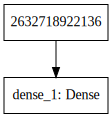

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))